In [10]:
import pubchempy as pcp
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

In [4]:
#ベンゼンの構造をpubchempyで取得し、原子の情報を取得する
benzene = pcp.get_compounds('benzene', 'name')
if len(benzene) == 1: benzene = benzene[0]
smiles = benzene.canonical_smiles
print(smiles) # 'C1=CC=CC=C1'
mol_ben = Chem.MolFromSmiles(smiles)
print(type(mol_ben)) # rdkit.Chem.rdchem.Mol
print(Chem.MolToMolBlock(mol_ben, includeStereo=False))

C1=CC=CC=C1
<class 'rdkit.Chem.rdchem.Mol'>

     RDKit          

  6  6  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  1  1  0
M  END



In [15]:
mol_benH = Chem.AddHs(mol_ben)
print(Chem.MolToMolBlock(mol_benH, includeStereo=False))



     RDKit          

 12 12  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  1  1  0
  1  7  1  0
  2  8

In [16]:
from rdkit.Chem import AllChem
AllChem.Compute2DCoords(mol_ben)
print(Chem.MolToMolBlock(mol_ben))


     RDKit          2D

  6  6  0  0  0  0  0  0  0  0999 V2000
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  1  1  0
M  END



In [43]:
from rdkit import rdBase, Chem
print(rdBase.rdkitVersion) # 2019.09.3
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
import py3Dmol
import pandas as pd
# 分子の読み込み
suppl = Chem.SDMolSupplier('C:\chem\chem02.sdf', removeHs=False)
mols = [x for x in suppl if x is not None]
len(mols) # 4548
mol = mols[20]

2019.03.4


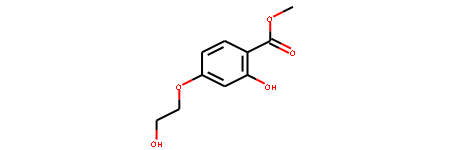

In [44]:
mol

In [46]:
def conf_generation(mol, numConfs, rms):
    sm = Chem.MolToSmiles(mol)
    m = Chem.MolFromSmiles(sm)
    m_h = Chem.AddHs(m)
    num_of_confs = []
    for i in rms:
        confids = AllChem.EmbedMultipleConfs(m_h, numConfs=numConfs,
                                             randomSeed=1234, pruneRmsThresh=i,
                                             numThreads=0)
        num_of_confs.append((i,len(confids)))
    return num_of_confs
 
rms = [0.5, 1.0, 1.5, 2.0] # 4レベルの閾値設定
num_of_confs = conf_generation(mol, 1000, rms)

In [47]:
num_of_confs 

[(0.5, 567), (1.0, 40), (1.5, 3), (2.0, 2)]

In [24]:
def mm_opt(mol, ff):
    sm = Chem.MolToSmiles(mol)
    m = Chem.MolFromSmiles(sm)
    m_h = Chem.AddHs(m)
    cids = AllChem.EmbedMultipleConfs(m_h, numConfs=100, randomSeed=1234,
                                     pruneRmsThresh=0.5, numThreads=0)
    if ff == 'uff':
        AllChem.UFFOptimizeMoleculeConfs(m_h, numThreads=0)
    if ff == 'mmff':
        AllChem.MMFFOptimizeMoleculeConfs(m_h, numThreads=0)
    rmsd = []
    m = Chem.RemoveHs(m_h)
    for cid in cids:
        rmsd.append(AllChem.GetConformerRMS(m, 0, cid))
    return rmsd
 
uff_rmsd = mm_opt(mol, 'uff')
mmff_rmsd = mm_opt(mol, 'mmff')
df = pd.DataFrame({'uff': uff_rmsd,
                  'mmff': mmff_rmsd})
df.describe().round(2)


,mmff,uff
count,63.00,63.00
mean,0.77,0.63
std,0.54,0.48
min,0.00,0.00
25%,0.00,0.01
50%,1.02,0.60
75%,1.10,1.07
max,1.38,1.22


In [25]:
df.head()

,mmff,uff
0,0.000000,0.000000
1,1.102803,0.604279
2,1.102793,0.604279
3,0.000025,0.011072
4,1.294236,1.208693


In [45]:
def opt_sp_mm(mol, ff):
    # 1. 1000個のコンフォマーを発生
    sm = Chem.MolToSmiles(mol)
    m = Chem.MolFromSmiles(sm)
    m_h = Chem.AddHs(m)
    cids = AllChem.EmbedMultipleConfs(m_h, numConfs=1000, randomSeed=1234,
                                       pruneRmsThresh=0.5, numThreads=0)
 
    # 2,3. 各コンフォマーを最適化し，エネルギー計算
    energy = []
    if ff == 'uff':
        for cid in cids:
            uff = AllChem.UFFGetMoleculeForceField(m_h, confId=cid)
            uff.Minimize()
            energy.append((uff.CalcEnergy(), cid))
    if ff == 'mmff':
        prop = AllChem.MMFFGetMoleculeProperties(m_h)
        for cid in cids:
            mmff = AllChem.MMFFGetMoleculeForceField(m_h, prop, confId=cid)
            mmff.Minimize()
            energy.append((mmff.CalcEnergy(), cid))
 
    # 4. エネルギーをソートし，相対エネルギーとIDをリストに格納
    energy.sort()
    return [(i-energy[0][0],j) for i,j in energy]
 
uff_e = opt_sp_mm(mol, 'uff')
mmff_e = opt_sp_mm(mol, 'mmff')

In [34]:
uff_e[:5],mmff_e[:5]

([(0.0, 14),
  (2.9409363833110547e-11, 20),
  (2.9105251542205224e-10, 22),
  (4.100115802430082e-10, 15),
  (5.081908227566601e-10, 44)],
 [(0.0, 79),
  (7.771205901008216e-11, 92),
  (1.1606005045905476e-10, 28),
  (2.72216027497052e-10, 57),
  (5.811173764413979e-10, 17)])

In [48]:
# コンフォマーを発生させ構造最適化を行う関数
def get_confs(mol, ff):
    sm = Chem.MolToSmiles(mol)
    m = Chem.MolFromSmiles(sm)
    m_h = Chem.AddHs(m)
    cids = AllChem.EmbedMultipleConfs(m_h, numConfs=1000, randomSeed=1234,
                                       pruneRmsThresh=0.5, numThreads=0)
    if ff == 'uff':
        for cid in cids:
            uff = AllChem.UFFGetMoleculeForceField(m_h, confId=cid)
            uff.Minimize()
    if ff == 'mmff':
        prop = AllChem.MMFFGetMoleculeProperties(m_h)
        for cid in cids:
            mmff = AllChem.MMFFGetMoleculeForceField(m_h, prop, confId=cid)
            mmff.Minimize()
    return Chem.RemoveHs(m_h)
 
# 5つの安定構造のIDを取得
uff_confIds = [j for i,j in uff_e[:5]]
mmff_confIds = [j for i,j in uff_e[:5]]
 
# UFF及びMMFFで最適化したコンフォマーを取得
uff = get_confs(mol, 'uff')
mmff = get_confs(mol, 'mmff')
 
# ベンゼンをテンプレートとして一致部位の取得
core = uff.GetSubstructMatch(Chem.MolFromSmiles('C1=CC=CC=C1'))
 
# テンプレートを用いてコンフォマーの整列
AllChem.AlignMolConformers(uff, atomIds=core)
AllChem.AlignMolConformers(mmff, atomIds=core)
 
# コンフォマーを重ね合わせて描画
v = py3Dmol.view(width=600, height=600)
for cid in uff_confIds:
    IPythonConsole.addMolToView(uff, confId=cid, view=v)
v.setBackgroundColor('0xeeeeee')
v.zoomTo()
v.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [49]:
#今ふぉまーの座標計算
conf = mol.GetConformer(0)
for i, (x,y,z) in enumerate(conf.GetPositions()[:10]):
    atom = mol.GetAtomWithIdx(i)
    print('{}\tx: {:.2f}\ty: {:.2f}\tz: {:.2f}'.format(atom.GetSymbol(),x,y,z))

O	x: 3.92	y: 1.38	z: 0.00
O	x: 2.54	y: 3.45	z: 0.00
C	x: 2.54	y: 2.07	z: 0.00
C	x: 1.17	y: 1.38	z: 0.00
C	x: 1.17	y: 0.00	z: 0.00
C	x: -0.21	y: -0.68	z: 0.00
C	x: -1.59	y: 0.00	z: 0.00
C	x: -1.59	y: 1.38	z: 0.00
C	x: -0.21	y: 2.07	z: 0.00
O	x: 2.54	y: -0.68	z: 0.00
